<a href="https://colab.research.google.com/github/gravity102424/ESAA/blob/main/ESAA_YB_1010_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**오차 행렬(혼동 행렬) 생성**



In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

# 종속변수(y)와 예측값(y_pred)으로 혼동 행렬 생성
cm = confusion_matrix(y, y_pred)

print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[337  20]
 [ 30 182]]


**정확도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [12]:
from sklearn.metrics import accuracy_score

# 정확도
accuracy_score(y, y_pred)


0.9121265377855887

Accuracy=TP+TN/FP+FN+TP+TN

데이터 불균형이 심할 경우 주의 필요(정확도만 높아도 성능이 좋다고 할 수 없음)

**정밀도의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [13]:
from sklearn.metrics import precision_score
precision_score(y, y_pred)

0.900990099009901

Precision=TP/FP+TP

정밀도가 높다는 것은, "모델이 양성(1) 이라고 예측한 경우 틀리는 경우가 적다”는 뜻이다.

**재현율의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [14]:
from sklearn.metrics import recall_score
recall_score(y, y_pred)

0.8584905660377359

Recall=TP/FN+TP

재현율이 높다 = 놓친 양성(FN)이 적다 → 민감도가 높음
즉, "실제 양성을 얼마나 잘 놓치지 않고 잡는가”를 보여준다.

**F1 score의 개념을 설명하고, 정확도를 구해 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [15]:
from sklearn.metrics import f1_score
f1_score(y, y_pred)

0.8792270531400966

F1 Score=2×(Precision+Recall)/(Precision×Recall)

정밀도(Precision)와 재현율(Recall)은 서로 반비례 관계에 있다.(예: FP를 줄이면 FN이 늘어남)
그래서 두 지표를 균형 있게 평가하는 수단으로 F1 score를 사용한다.

**예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.**

In [5]:
from sklearn.preprocessing import Binarizer
# 예측 확률 계산
y_proba = model_lor.predict_proba(X)

# 0으로 예측할 확률이 0.1보다 큰 경우 → 0으로 예측
y_pred2 = (y_proba[:, 0] <= 0.1).astype(int)

In [6]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 혼동 행렬
cm = confusion_matrix(y, y_pred2)

# 정확도
acc = accuracy_score(y, y_pred2)

# 정밀도
prec = precision_score(y, y_pred2)

# 재현율
rec = recall_score(y, y_pred2)

# F1 점수
f1 = f1_score(y, y_pred2)

# 결과 출력
print('📊 혼동 행렬 (Confusion Matrix):\n', cm)
print(f'\n✅ 정확도(Accuracy): {acc:.4f}')
print(f'✅ 정밀도(Precision): {prec:.4f}')
print(f'✅ 재현율(Recall): {rec:.4f}')
print(f'✅ F1 Score: {f1:.4f}')


📊 혼동 행렬 (Confusion Matrix):
 [[356   1]
 [ 73 139]]

✅ 정확도(Accuracy): 0.8699
✅ 정밀도(Precision): 0.9929
✅ 재현율(Recall): 0.6557
✅ F1 Score: 0.7898


**ROC 곡선 시각화**

In [7]:
from sklearn.metrics import roc_curve
y_proba = model_lor.predict_proba(X)[:, 1]

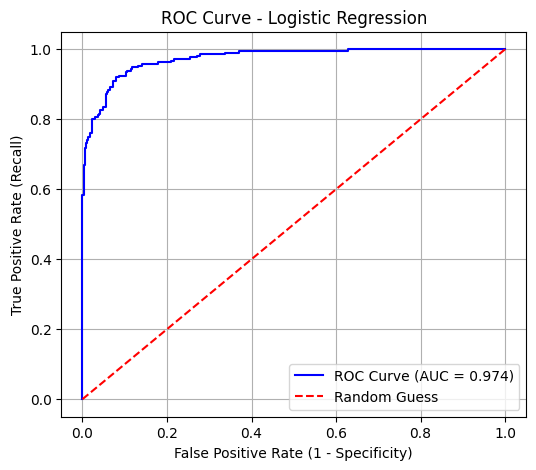

In [11]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guess')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend()
plt.grid(True)
plt.show()

**ROC AUC 값을 구하고 해당 값을 통해 알 수 있는 점을 쓰시오.**

In [10]:
from sklearn.metrics import roc_auc_score

# 예측 확률(클래스 1일 확률)
y_proba = model_lor.predict_proba(X)[:, 1]

# ROC AUC 계산
auc = roc_auc_score(y, y_proba)

print('ROC AUC 값 :', auc)

ROC AUC 값 : 0.974076423022039


AUC (Area Under the Curve)는 ROC 곡선(재현율 vs 1-특이도) 아래의 면적을 의미한다.

즉, 모델이 임의의 한 쌍(하나는 양성, 하나는 음성)을 선택했을 때,
양성 샘플을 더 높은 확률로 예측할 확률을 나타낸다.